In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




Specify file paths

In [2]:
names.sample = c("s1d1",
                 "s1d2",
                 "s1d3",
                 "s2d1",
                 "s2d4",
                 "s2d5",
                 "s3d10",
                 "s3d3",
                 "s3d6",
                 "s3d7",
                 "s4d1",
                 "s4d8",
                 "s4d9")

paths.meta = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor1/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor2/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor3/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor1/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor4/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor5/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor10/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor3/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor6/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor7/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor1/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor8/outs/per_barcode_metrics.csv",
               "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor9/outs/per_barcode_metrics.csv")

paths.matrix = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor1/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor2/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor3/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor1/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor4/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor5/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor10/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor3/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor6/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor7/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor1/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor8/outs/raw_feature_bc_matrix/",
                 "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor9/outs/raw_feature_bc_matrix/")

paths.fragments = c("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor1/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor2/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor3/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor1/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor4/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor5/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor10/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor3/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor6/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site3_donor7/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor1/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor8/outs/atac_fragments.tsv.gz",
                    "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site4_donor9/outs/atac_fragments.tsv.gz")


Import meta data

In [3]:
list.meta = list()
for (n.tmp in 1:length(names.sample)) {
  meta.tmp =
    read.csv(paths.meta[n.tmp],
             stringsAsFactors = F)
  meta.tmp$sample = names.sample[n.tmp]
  meta.tmp$sample_barcode = paste(names.sample[n.tmp],
                                  meta.tmp$barcode,
                                  sep = "_")
  list.meta[[names.sample[n.tmp]]] = meta.tmp
  rm(meta.tmp)
}
meta.merge = do.call(rbind,list.meta)
row.names(meta.merge) = meta.merge$sample_barcode
rm(list.meta)

Import matrix

In [4]:
list.matrix = list()
for (n.tmp in 1:length(names.sample)) {
  matrix.tmp = Read10X(data.dir = paths.matrix[n.tmp])
  colnames(matrix.tmp$`Gene Expression`) =
    paste(names.sample[n.tmp],
          colnames(matrix.tmp$`Gene Expression`),
          sep = "_")
  colnames(matrix.tmp$Peaks) =
    paste(names.sample[n.tmp],
          colnames(matrix.tmp$Peaks),
          sep = "_")
  list.matrix[[names.sample[n.tmp]]] = matrix.tmp
  rm(matrix.tmp)
}

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a list containing matrices of each type.

10X data contains more than one type and is being returned as a 

Import annotated metadata

In [5]:
metadata.anno = read.csv("../../../data/BMMC/1.prepare_data/1.extract_metadata_from_h5ad.240506/metadata.h5ad.csv",
                        row.name = 1)
metadata.anno

,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,⋯,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TAGTTGTCACCCTCAC-1-s1d1,1.0610080,1508,1022,0.45348439,S,4031,5400,0.7464815,0.0034730836,0.6424682,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.6042296,1655,1081,0.45563113,G2M,8636,19266,0.4482508,0.0031264474,1.2206790,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.6500692,7230,3304,2.43534805,G2M,4674,6177,0.7566780,0.0012836970,0.6925734,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.8122744,1108,793,0.34722636,G2M,2803,4019,0.6974372,0.0007135212,0.6338384,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.6747704,1851,1219,0.53420511,G2M,1790,2568,0.6970405,0.0033519553,0.7276596,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TGGATTGGTTTGCGAA-1-s1d1,0.8339076,14510,4345,3.59536798,G2M,2825,3828,0.7379833,0.0000000000,0.5352798,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
GTGAGCGAGTAAAGGT-1-s1d1,1.7422495,3903,2189,1.32788429,S,10802,18539,0.5826636,0.0025921126,1.0166445,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
GACTTAGGTTGCGCGA-1-s1d1,0.3864734,1035,799,0.33666893,G2M,4540,6723,0.6752938,0.0017621145,0.7714286,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
GCCTTACTCGTTACAA-1-s1d1,0.3795721,8694,3674,3.02550638,S,26624,37895,0.7025729,0.0027043269,0.8506173,⋯,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker


Unify cell name

In [6]:
metadata.anno[,"barcode"] = do.call(rbind,strsplit(rownames(metadata.anno),"-"))[,1]
metadata.anno[,"rename"] = paste(metadata.anno[,"batch"],
                                 "_",
                                 metadata.anno[,"barcode"],
                                 "-1",
                                sep = "")
rownames(metadata.anno) = metadata.anno[,"rename"]
metadata.anno

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 21464)”


,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,⋯,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,barcode,rename
,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s1d1_TAGTTGTCACCCTCAC-1,1.0610080,1508,1022,0.45348439,S,4031,5400,0.7464815,0.0034730836,0.6424682,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TAGTTGTCACCCTCAC,s1d1_TAGTTGTCACCCTCAC-1
s1d1_CTATGGCCATAACGGG-1,0.6042296,1655,1081,0.45563113,G2M,8636,19266,0.4482508,0.0031264474,1.2206790,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,CTATGGCCATAACGGG,s1d1_CTATGGCCATAACGGG-1
s1d1_CCGCACACAGGTTAAA-1,0.6500692,7230,3304,2.43534805,G2M,4674,6177,0.7566780,0.0012836970,0.6925734,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,CCGCACACAGGTTAAA,s1d1_CCGCACACAGGTTAAA-1
s1d1_TCATTTGGTAATGGAA-1,0.8122744,1108,793,0.34722636,G2M,2803,4019,0.6974372,0.0007135212,0.6338384,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TCATTTGGTAATGGAA,s1d1_TCATTTGGTAATGGAA-1
s1d1_ACCACATAGGTGTCCA-1,1.6747704,1851,1219,0.53420511,G2M,1790,2568,0.6970405,0.0033519553,0.7276596,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,ACCACATAGGTGTCCA,s1d1_ACCACATAGGTGTCCA-1
s1d1_TGGATTGGTTTGCGAA-1,0.8339076,14510,4345,3.59536798,G2M,2825,3828,0.7379833,0.0000000000,0.5352798,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TGGATTGGTTTGCGAA,s1d1_TGGATTGGTTTGCGAA-1
s1d1_GTGAGCGAGTAAAGGT-1,1.7422495,3903,2189,1.32788429,S,10802,18539,0.5826636,0.0025921126,1.0166445,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GTGAGCGAGTAAAGGT,s1d1_GTGAGCGAGTAAAGGT-1
s1d1_GACTTAGGTTGCGCGA-1,0.3864734,1035,799,0.33666893,G2M,4540,6723,0.6752938,0.0017621145,0.7714286,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GACTTAGGTTGCGCGA,s1d1_GACTTAGGTTGCGCGA-1
s1d1_GCCTTACTCGTTACAA-1,0.3795721,8694,3674,3.02550638,S,26624,37895,0.7025729,0.0027043269,0.8506173,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GCCTTACTCGTTACAA,s1d1_GCCTTACTCGTTACAA-1


Retain annoated cells

In [7]:
table(metadata.anno$rename %in% rownames(meta.merge))


 TRUE 
69249 

In [8]:
meta.merge.filter = meta.merge[rownames(metadata.anno),]
meta.merge.filter = cbind(meta.merge.filter,metadata.anno)
dim(meta.merge.filter)
meta.merge.filter

[1] 69249    63

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,barcode,rename
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s1d1_TAGTTGTCACCCTCAC-1,TAGTTGTCACCCTCAC-1,TAGTTGTCACCCTCAC-1,GGACAACGTAAGTGGC-1,1,0,13548,13091,370,5386,6200,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TAGTTGTCACCCTCAC,s1d1_TAGTTGTCACCCTCAC-1
s1d1_CTATGGCCATAACGGG-1,CTATGGCCATAACGGG-1,CTATGGCCATAACGGG-1,CAACCTGGTCCTCCCA-1,1,0,12415,11865,358,3748,4268,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,CTATGGCCATAACGGG,s1d1_CTATGGCCATAACGGG-1
s1d1_CCGCACACAGGTTAAA-1,CCGCACACAGGTTAAA-1,CCGCACACAGGTTAAA-1,GAACCGGGTTAACACC-1,1,0,64631,62125,2108,21749,25742,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,CCGCACACAGGTTAAA,s1d1_CCGCACACAGGTTAAA-1
s1d1_TCATTTGGTAATGGAA-1,TCATTTGGTAATGGAA-1,TCATTTGGTAATGGAA-1,CCGCAAGCAGGTTCTT-1,1,0,8873,8544,271,3019,4489,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TCATTTGGTAATGGAA,s1d1_TCATTTGGTAATGGAA-1
s1d1_ACCACATAGGTGTCCA-1,ACCACATAGGTGTCCA-1,ACCACATAGGTGTCCA-1,GGTTACCTCCTCACGG-1,1,0,14880,14353,273,7635,5060,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,ACCACATAGGTGTCCA,s1d1_ACCACATAGGTGTCCA-1
s1d1_TGGATTGGTTTGCGAA-1,TGGATTGGTTTGCGAA-1,TGGATTGGTTTGCGAA-1,CAACATGCACCTGGCT-1,1,0,126119,122017,2859,57748,33938,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,TGGATTGGTTTGCGAA,s1d1_TGGATTGGTTTGCGAA-1
s1d1_GTGAGCGAGTAAAGGT-1,GTGAGCGAGTAAAGGT-1,GTGAGCGAGTAAAGGT-1,TAAAGCATCTAAGCGG-1,1,0,29874,28904,1054,14029,11615,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GTGAGCGAGTAAAGGT,s1d1_GTGAGCGAGTAAAGGT-1
s1d1_GACTTAGGTTGCGCGA-1,GACTTAGGTTGCGCGA-1,GACTTAGGTTGCGCGA-1,TTAGGATCACTAGCTT-1,1,0,8982,8675,376,3100,4131,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GACTTAGGTTGCGCGA,s1d1_GACTTAGGTTGCGCGA-1
s1d1_GCCTTACTCGTTACAA-1,GCCTTACTCGTTACAA-1,GCCTTACTCGTTACAA-1,CTAGCCTAGTGCAACG-1,1,0,69068,65936,2396,22489,30507,⋯,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,GCCTTACTCGTTACAA,s1d1_GCCTTACTCGTTACAA-1


In [9]:
list.matrix.rna.filter = list()
for (n.tmp in 1:length(names.sample)) {
  matrix.rna.tmp = list.matrix[[names.sample[n.tmp]]]$`Gene Expression`
  matrix.rna.tmp = matrix.rna.tmp[,colnames(matrix.rna.tmp) %in% meta.merge.filter$sample_barcode]
  list.matrix.rna.filter[[names.sample[n.tmp]]] = matrix.rna.tmp
  rm(matrix.rna.tmp)
}
matrix.rna = do.call(cbind,list.matrix.rna.filter)
matrix.rna = matrix.rna[,meta.merge.filter$sample_barcode]
dim(matrix.rna)

[1] 62757 69249

Creat seurat object

In [10]:
obj.seurat <- CreateSeuratObject(
  counts = matrix.rna,
  assay = "RNA",
  meta.data = meta.merge.filter
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Run UMAP

In [11]:
obj.seurat <- obj.seurat %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  ANK1, SLC25A21, SPTA1, SOX6, SLC4A1, CA1, SPTB, RHAG, SNCA, CA2 
	   KEL, SLC25A37, CR1L, LTBP1, HEMGN, ALAS2, TFRC, NFIA, CENPF, BLVRB 
	   DIAPH3, GYPB, AHSP, HBM, MBOAT2, RHCE, MKI67, PRDX2, HMBS, TLN2 
Negative:  CD74, NAMPT, SAMSN1, SAT1, LRRK2, CYRIA, TNFAIP3, ARHGAP24, FCN1, HDAC9 
	   DMXL2, ANXA1, TBXAS1, KYNU, SLC8A1, RBM47, PDE4B, SULF2, VCAN, SLC11A1 
	   GAB2, RAB31, TYMP, CD83, ETV6, IRAK3, HLA-DRB1, CLEC7A, CD247, TMTC2 
PC_ 2 
Positive:  CD247, BCL11B, IL32, CD69, CCL5, NKG7, TGFBR3, IL7R, THEMIS, GNLY 
	   MT-CO3, PRF1, NCALD, RPS27, CAMK4, RPS28, MT-CO2, CST7, RPSA, LINC01934 
	   RPL3, ANK3, PPP2R2B, CD7, RPS15, LTB, CTSW, GZMH, INPP4B, TRBC1 
Negative:  PLXDC2, LRMDA, IRAK3, SLC8A1, VCAN, RBM47, DMXL2, FCN1, NAMPT, MCTP1 
	   FGD4, LRRK2, WDFY3, CSF3R, RAB31, GAB2, SLC11A1, MAML3, TBXAS1, SULF2 
	   TLR2, CLEC7A, CPPED1, ACSL1, KYNU, EPB41L3, T

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


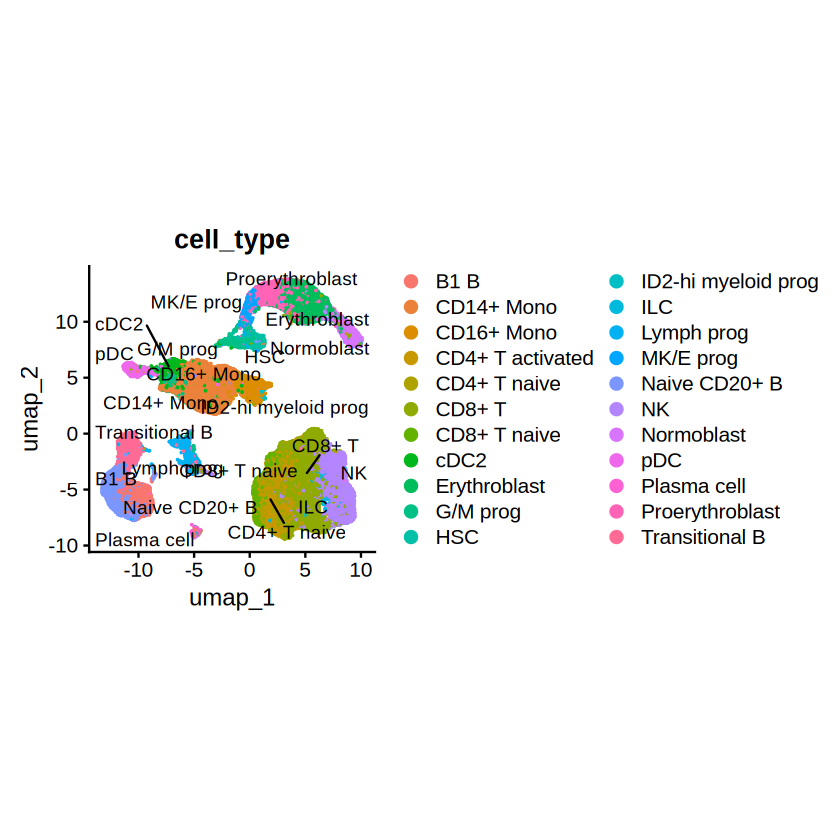

In [12]:
p = DimPlot(obj.seurat, 
        group.by = "cell_type",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.cell_type.pdf", 
       plot = p, 
       width = 10, height = 8)


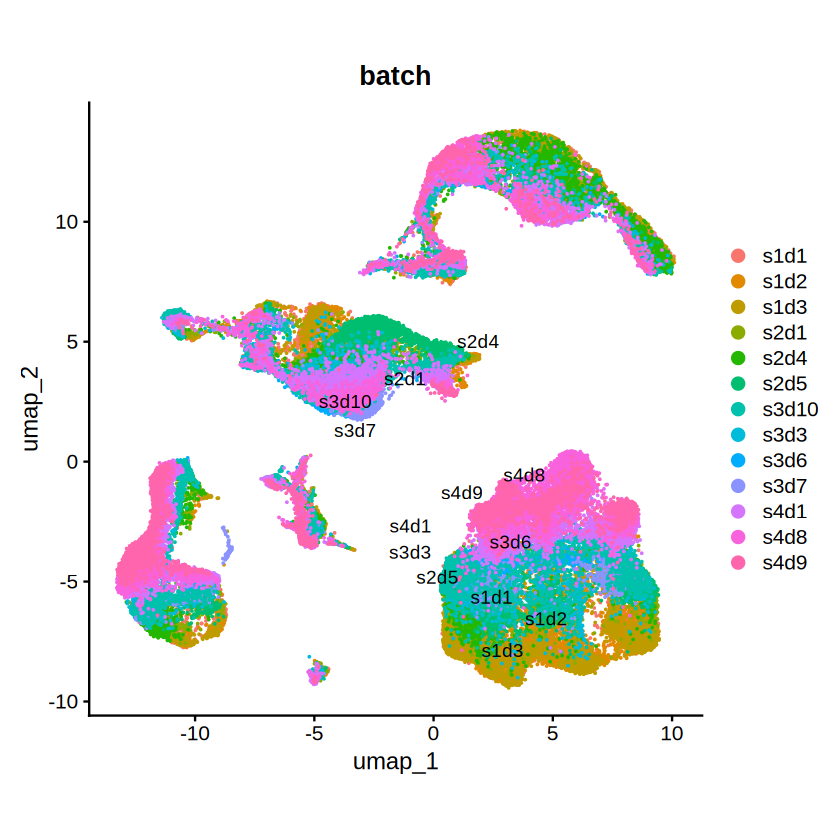

In [13]:
p = DimPlot(obj.seurat, 
        group.by = "batch",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.batch.pdf", 
       plot = p, 
       width = 10, height = 8)

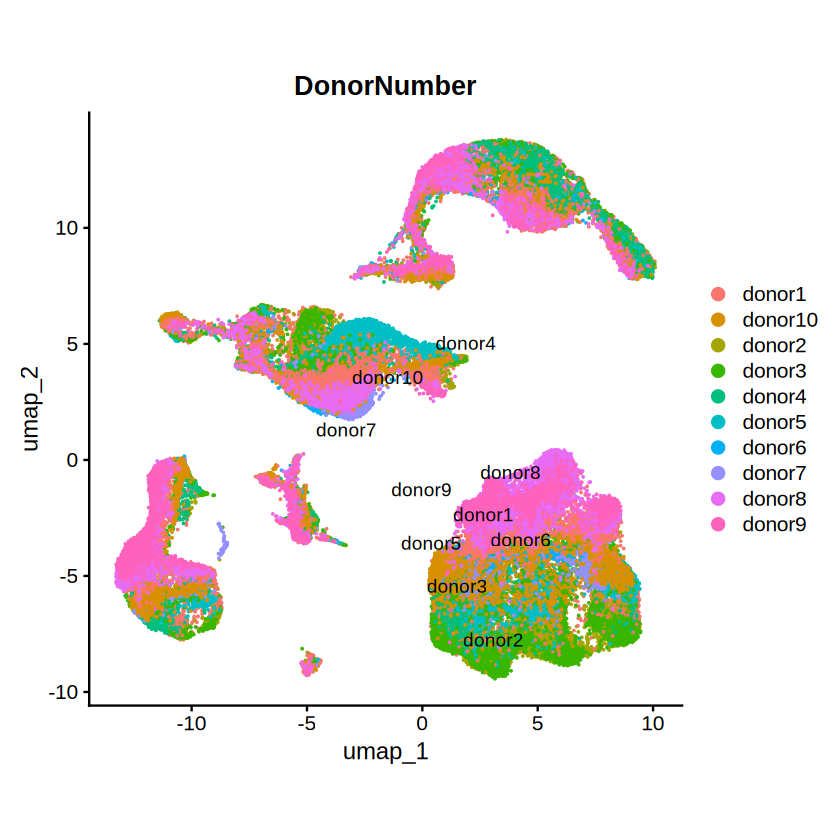

In [14]:
p = DimPlot(obj.seurat, 
        group.by = "DonorNumber",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.DonorNumber.pdf", 
       plot = p, 
       width = 10, height = 8)

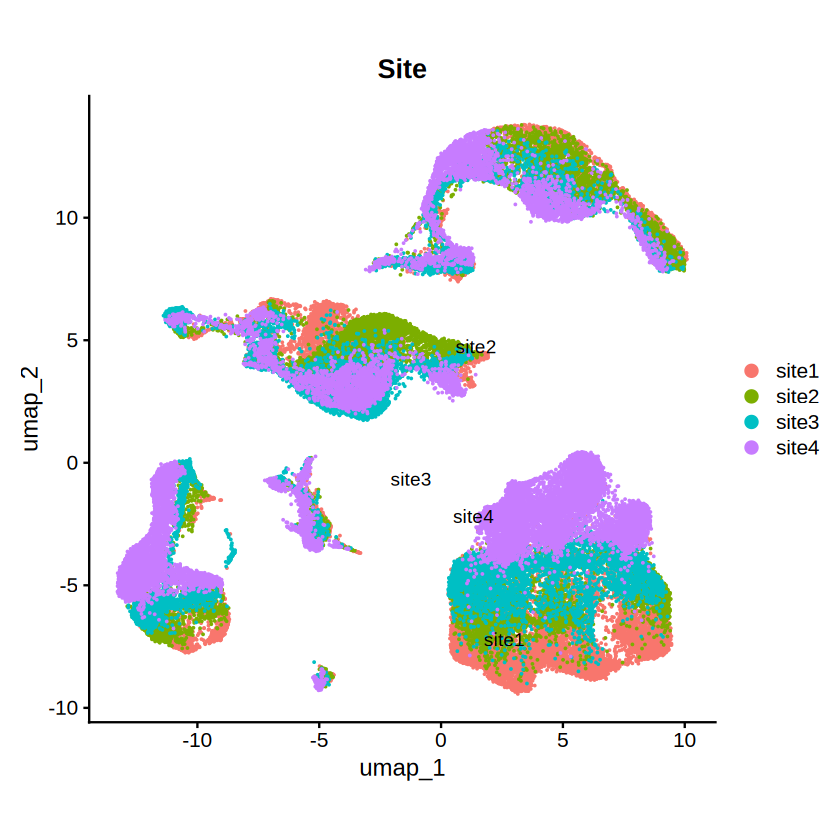

In [15]:
p = DimPlot(obj.seurat, 
        group.by = "Site",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.Site.pdf", 
       plot = p, 
       width = 10, height = 8)

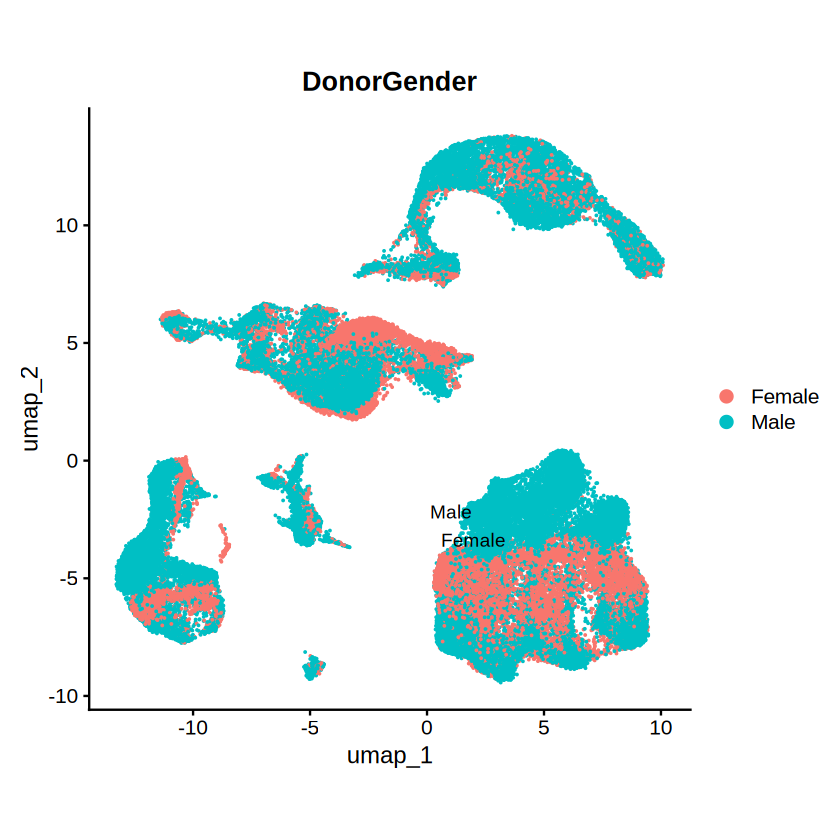

In [16]:
p = DimPlot(obj.seurat, 
        group.by = "DonorGender",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.DonorGender.pdf", 
       plot = p, 
       width = 10, height = 8)

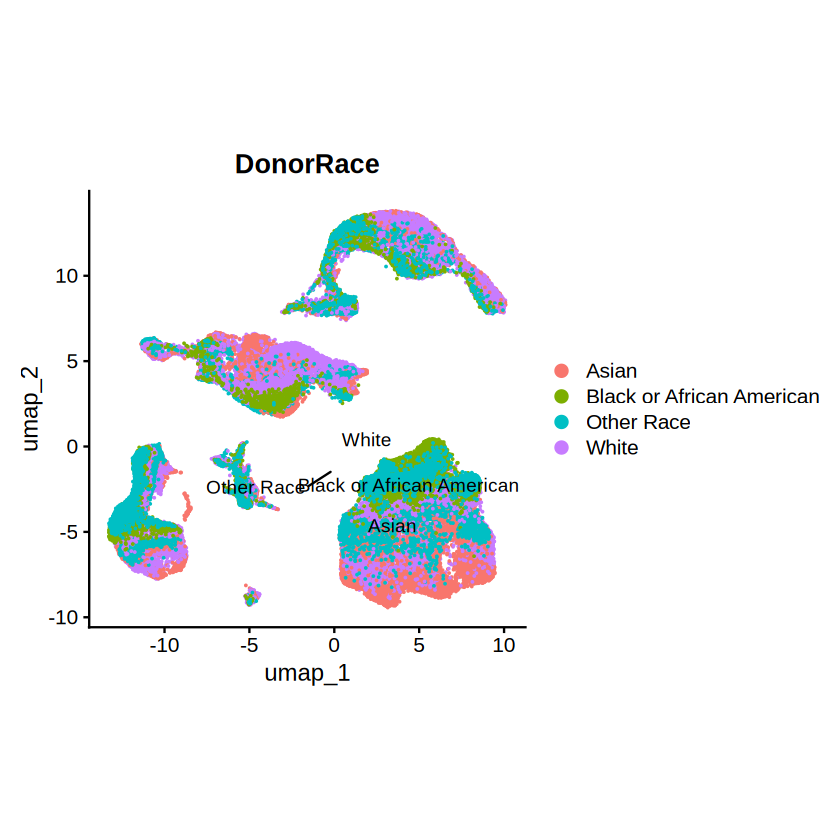

In [17]:
p = DimPlot(obj.seurat, 
        group.by = "DonorRace",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.DonorRace.pdf", 
       plot = p, 
       width = 10, height = 8)

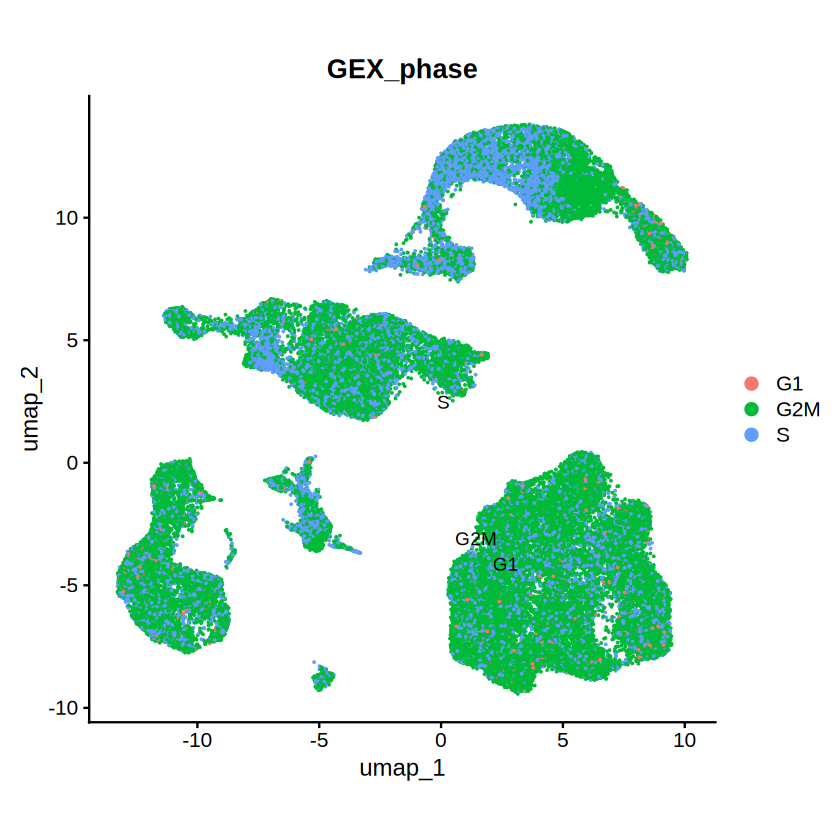

In [18]:
p = DimPlot(obj.seurat, 
        group.by = "GEX_phase",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.GEX_phase.pdf", 
       plot = p, 
       width = 10, height = 8)

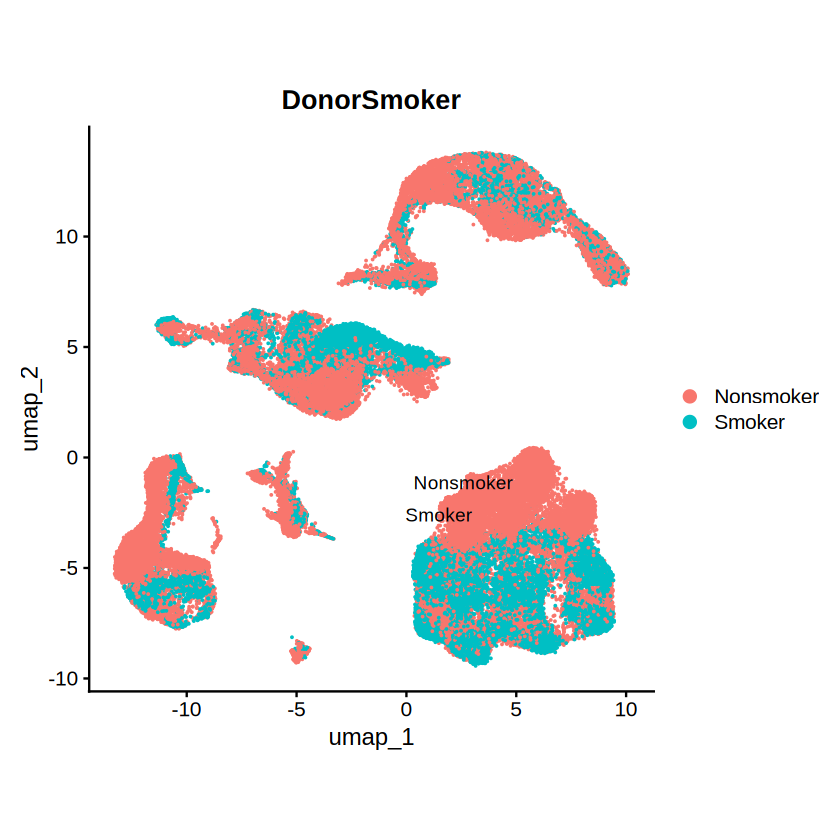

In [19]:
p = DimPlot(obj.seurat, 
        group.by = "DonorSmoker",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.DonorSmoker.pdf", 
       plot = p, 
       width = 10, height = 8)

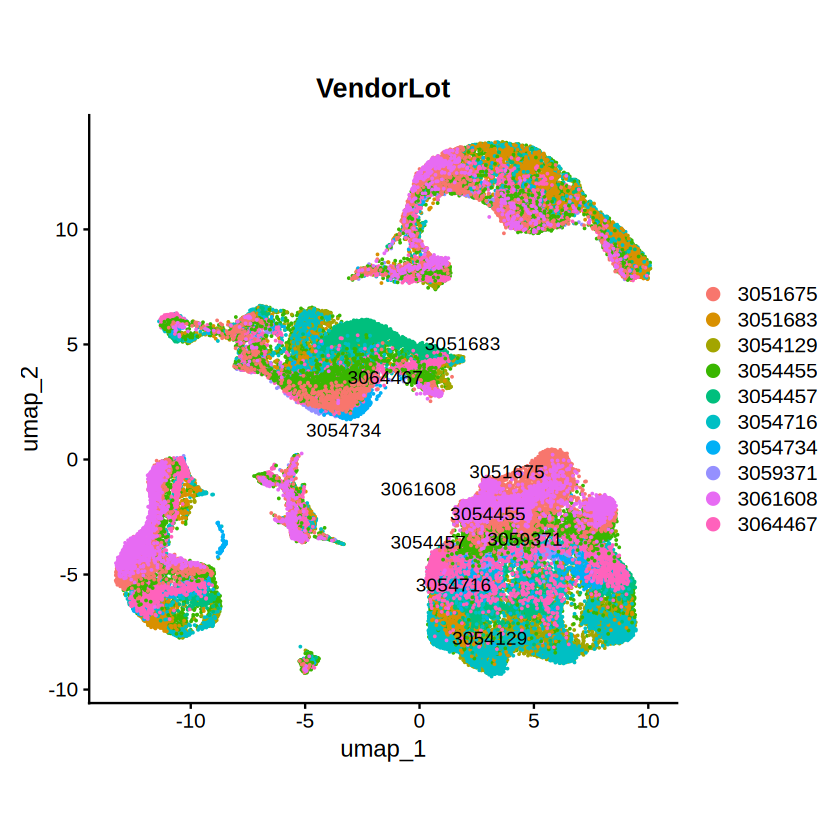

In [20]:
p = DimPlot(obj.seurat, 
        group.by = "VendorLot",
        label = TRUE, 
        repel = TRUE, 
        reduction = "umap")  +
  theme(aspect.ratio=1)
p
ggsave("../../../output/BMMC/1.prepare_data/2.seurat_pipeline.240506/UMAP.RNA.VendorLot.pdf", 
       plot = p, 
       width = 10, height = 8)

Create a empty ChromatinAssay

In [21]:
matrix.atac.empty = matrix.rna[1:3,]
matrix.atac.empty[,] = 0
rownames(matrix.atac.empty) = c("chr1-1-100",
                                "chr2-1-100",
                                "chr3-1-100")
matrix.atac.empty

  [[ suppressing 34 column names ‘s1d1_TAGTTGTCACCCTCAC-1’, ‘s1d1_CTATGGCCATAACGGG-1’, ‘s1d1_CCGCACACAGGTTAAA-1’ ... ]]



3 x 69249 sparse Matrix of class "dgCMatrix"
                                                                              
chr1-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr2-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr3-1-100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                 
chr1-1-100 ......
chr2-1-100 ......
chr3-1-100 ......

 .....suppressing 69215 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [22]:
list.fragments = list()
for (n.tmp in 1:length(names.sample)) {
  cells.tmp = meta.merge.filter[meta.merge.filter$sample == names.sample[n.tmp],"barcode"]
  names(cells.tmp) = meta.merge.filter[meta.merge.filter$sample == names.sample[n.tmp],"sample_barcode"]
  list.fragments[[n.tmp]] =
    CreateFragmentObject(path = paths.fragments[n.tmp],
                         cells = cells.tmp)
}

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash

Computing hash



In [23]:
obj.seurat[["ATAC_empty"]] <- CreateChromatinAssay(
  counts = matrix.atac.empty,
  fragments = list.fragments)

Rename cell types to avoid "+", "-", "/", and spaces

In [24]:
obj.seurat$cell_type.rename = gsub("\\+","_pos",obj.seurat$cell_type)
obj.seurat$cell_type.rename = gsub(" ","_",obj.seurat$cell_type.rename)
obj.seurat$cell_type.rename = gsub("/","_",obj.seurat$cell_type.rename)
obj.seurat$cell_type.rename = gsub("-","_",obj.seurat$cell_type.rename)

sort(table(obj.seurat$cell_type.rename),
     decreasing = T)


          CD8_pos_T       CD14_pos_Mono                  NK CD4_pos_T_activated 
              11589               10843                6929                5526 
   Naive_CD20_pos_B        Erythroblast     CD4_pos_T_naive      Transitional_B 
               5052                4916                4398                2810 
    Proerythroblast       CD16_pos_Mono                B1_B          Normoblast 
               2300                1894                1890                1780 
         Lymph_prog            G_M_prog                 pDC                 HSC 
               1779                1203                1191                1072 
    CD8_pos_T_naive           MK_E_prog                cDC2                 ILC 
               1012                 884                 859                 835 
        Plasma_cell ID2_hi_myeloid_prog 
                379                 108 

Generate fragment files for each cell type

In [28]:
dir_path.frag_split = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/fragments_split"
Signac::SplitFragments(obj.seurat,
                      assay = "ATAC_empty",
                      group.by = "cell_type.rename",
                      append = F,
                      outdir = dir_path.frag_split)

Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor1/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor2/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site1_donor3/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor1/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240430/neurips2021_BMMC/cellranger_res/site2_donor4/outs/atac_fragments.tsv.gz




Processing file /maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240

In [ ]:
dir_path.frag = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/fragments"
for(name.cell_type in unique(obj.seurat$cell_type.rename)){
  df.frag = data.frame(
    Column1 = character(0),
    Column2 = integer(0),
    Column3 = integer(0),
    Column4 = character(0),
    Column5 = integer(0)
  )
  
  for (n.tmp in 1:length(names.sample)) {
    cat(name.cell_type,n.tmp,"\n")
    
    path.frag.tmp = paste(dir_path.frag_split,
                          "/",
                          name.cell_type,
                          ".",
                          n.tmp,
                          ".bed",
                          sep = "")
    if (file.info(path.frag.tmp)$size > 0) {
      df.frag.tmp = 
        read.delim(path.frag.tmp,
                   header = F)
      df.frag.tmp[,4] = paste(names.sample[n.tmp],
                              df.frag.tmp[,4],
                              sep = "_")
      df.frag = rbind(df.frag,
                      df.frag.tmp)
    }
  }
  
  df.frag = df.frag[order(df.frag[,2]),]
  df.frag = df.frag[order(df.frag[,1]),]
  
  write.table(df.frag,
              paste(dir_path.frag,"/",name.cell_type,".","atac_fragments.tsv",sep = ""),
              col.names = F,
              row.names = F,
              quote = F,
              sep = "\t")
  remove(df.frag)
  
  Rsamtools::bgzip(paste(dir_path.frag,"/",name.cell_type,".","atac_fragments.tsv",sep = ""),
                   paste(dir_path.frag,"/",name.cell_type,".","atac_fragments.tsv.gz",sep = ""))
  
  Rsamtools::indexTabix(paste(dir_path.frag,"/",name.cell_type,".","atac_fragments.tsv.gz",sep = ""),
                        format = "bed")
  system(paste("rm -f",paste(dir_path.frag,"/",name.cell_type,".","atac_fragments.tsv",sep = "")))
}

Generate RNA count matrix for each cell type

In [32]:
dir_path.rna_matrix = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/RNA_count_matrix/"

for(name.cell_type in unique(obj.seurat$cell_type.rename)){
  matrix.tmp = 
    obj.seurat@assays$RNA$count[,obj.seurat$cell_type.rename == name.cell_type]
  write.csv(as.data.frame(matrix.tmp),
            gzfile(paste(dir_path.rna_matrix,
                         "/",
                         name.cell_type,
                         ".rna_count_matrix.csv.gz",
                        sep = "")),
            quote = F)
}

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.1 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.6 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.2 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


Save obj.seurat


In [34]:
saveRDS(obj.seurat,
         "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/obj.seurat.rds")

In [35]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1      magrittr_2.0.3     Signac_1.13.0      Seurat_5.0.3      
[5] SeuratObject_5.0.1 sp_2.1-4          

loaded via a namespace (and not atta

In [2]:
obj.seurat = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/obj.seurat.rds")

In [3]:
write.csv(t(as.data.frame(obj.seurat@assays$RNA$count)),
          gzfile("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/rna_count_matrix.t.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 32.4 GiB”


In [9]:
df.cell_type = data.frame(cell_type = names(table(obj.seurat$cell_type.rename)),
                          cell_number = table(obj.seurat$cell_type.rename),
                          total_fragment_count = NA,
                          total_UMI_count = NA)
rownames(df.cell_type) = df.cell_type$cell_type

for(cell_type.tmp in df.cell_type$cell_type){
    cell_names.tmp = colnames(obj.seurat)[obj.seurat@meta.data$cell_type.rename == cell_type.tmp]
    df.cell_type[cell_type.tmp,"total_fragment_count"] = sum(obj.seurat@meta.data[cell_names.tmp,"atac_fragments"])
    df.cell_type[cell_type.tmp,"total_UMI_count"] = sum(obj.seurat@meta.data[cell_names.tmp,"gex_umis_count"])
}

df.cell_type$mean_fragment_count = round(df.cell_type$total_fragment_count / df.cell_type$cell_number.Freq,0)
df.cell_type$mean_UMI_count = round(df.cell_type$total_UMI_count / df.cell_type$cell_number.Freq,0)

In [10]:
write.csv(df.cell_type,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/2.seurat_pipeline.240506/df.cell_type.csv")